<a href="https://colab.research.google.com/github/Rafaela-neves/MVP-Rafaela-Neves/blob/main/MVP_Rafaela_Neves_06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Análise de Dados e Boas Práticas **

**Nome:** Rafaela Neves da Silva

**Matrícula:** 4052024002139

**Dataset:** https://www.kaggle.com/datasets/tunguz/drug-use-by-age

**1. Importação das Bibliotecas Necessárias**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set_style("whitegrid")
%matplotlib inline

In [11]:
import pandas as pd
df = pd.read_csv("drug-use-by-age.csv")
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


**2. Definição do Problema e Contexto**
  
**2.1. Descrição do Problema**

Analisar padrões de uso de substâncias psicoativas em diferentes faixas etárias, identificando correlações entre idade e consumo de drogas lícitas e ilícitas. Essa análise é relevante para compreender o comportamento de grupos vulneráveis e pode embasar políticas públicas e campanhas de conscientização.

**2.2. Tipo de Problema**

Análise exploratória de dados (EDA), com possibilidade de aplicação de modelos supervisionados para previsão de consumo com base na faixa etária.

**2.3. Hipóteses**

- O uso de substâncias varia significativamente com a idade.

- Certas drogas têm maior prevalência em faixas etárias específicas.

- Há correlação entre o uso de diferentes substâncias.

**2.4. Restrições**

O dataset é baseado em dados agregados por faixa etária, sem informações individuais ou demográficas detalhadas, o que limita a construção de perfis multivariados.

**2.5. Atributos do Dataset**

O dataset contém:

- age: Faixa etária
- n: Número total de pessoas em cada faixa etária
- drug-use: Percentual (%) de participantes que afirmaram ter consumido álcool nos últimos 12 meses
- drug-frequency: Mediana de vezes que esses participantes consumiram álcool durante o período

Os atributos "use" e "frequency" se repetem para cada substâncias, permintindo análises comparativas.

**3. Carga e Análise Inicial dos Dados**

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("drug-use-by-age.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

**4. Pré-processamento de Dados**

**4.1. Conversão de Tipos e Normalização**

In [21]:
# Substituindo valores inválidos
df.replace('-', np.nan, inplace=True)

# Conversão de tipos
for col in df.columns:
    if col != 'age':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Escalonamento das variáveis numéricas
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('n')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Os valores foram centralizados pela média para facilitar comparações. A coluna `n` foi excluída do escalonamento por não representar uma variável de consumo.

**5. Análise Exploratória de Dados (EDA)**

**5.1. Distribuição por Faixa Etária**

/tmp/ipython-input-22-568000092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='age', y='n', palette='viridis')


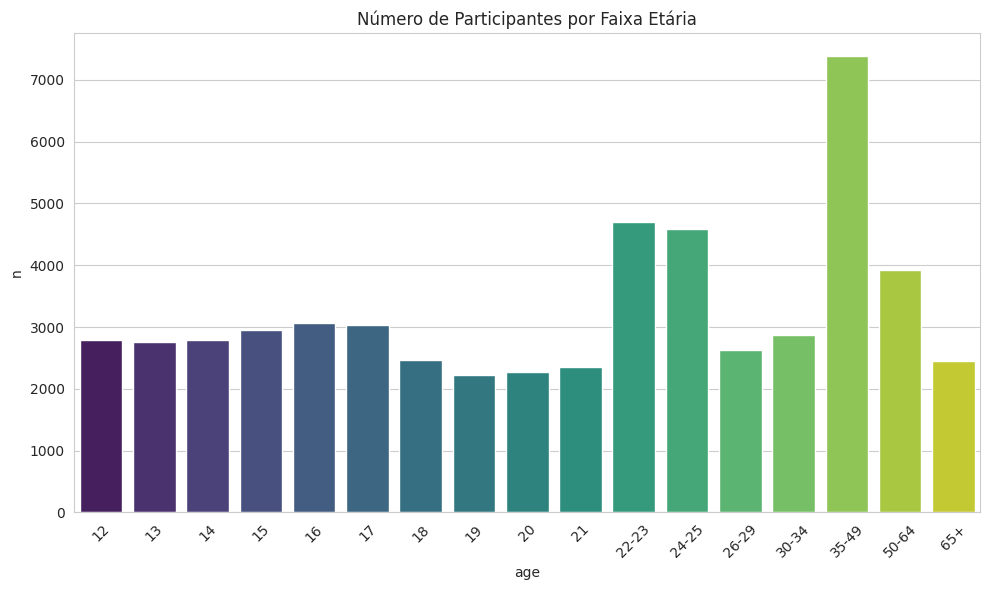

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Distribuição por faixa etária
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age', y='n', palette='viridis')
plt.title("Número de Participantes por Faixa Etária")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A maior participação se concentra entre os 16 e 25 anos, refletindo a janela crítica para análise de comportamento de risco.

**5.2. Consumo de Álcool e Maconha por Idade**

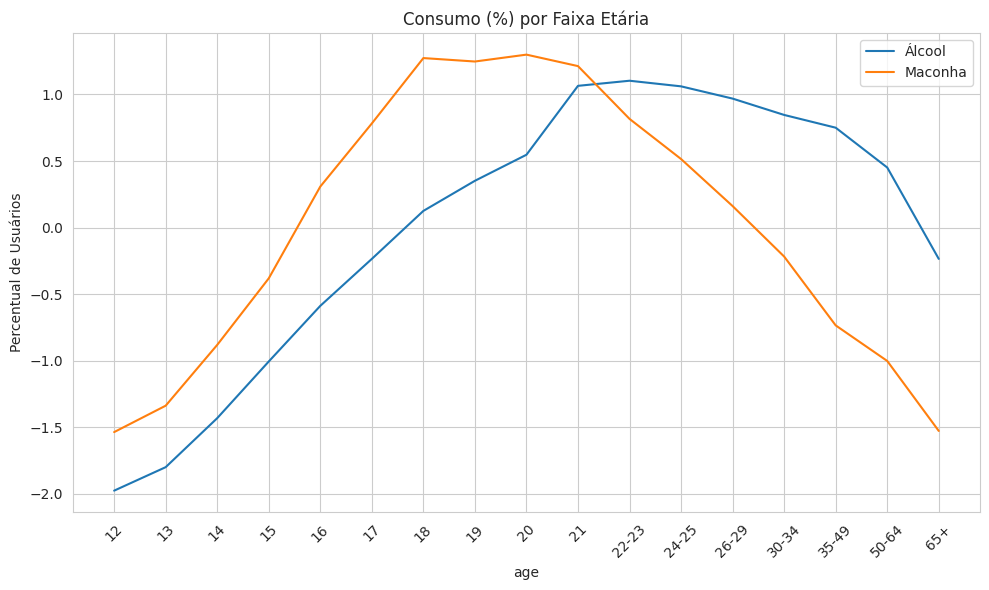

In [23]:
# Consumo de álcool e maconha
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='age', y='alcohol-use', label='Álcool')
sns.lineplot(data=df, x='age', y='marijuana-use', label='Maconha')
plt.title("Consumo (%) por Faixa Etária")
plt.ylabel("Percentual de Usuários")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

O consumo de álcool cresce rapidamente até os 21 anos, enquanto o uso de maconha apresenta pico entre 18 e 25 anos.

**5.3. Correlação entre Substâncias**

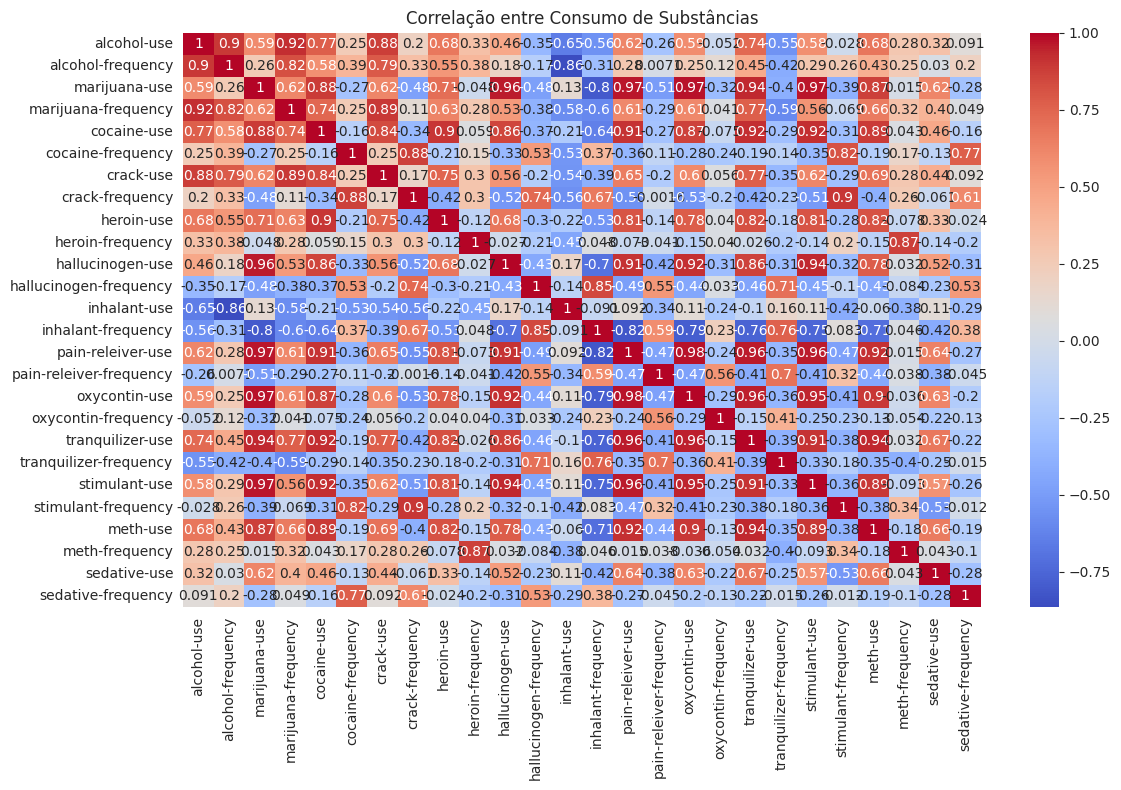

In [24]:
# Correlação entre substâncias
corr = df.drop(columns=['age', 'n']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlação entre Consumo de Substâncias")
plt.tight_layout()
plt.show()


**5.4. Análise de Tendência por Substância**

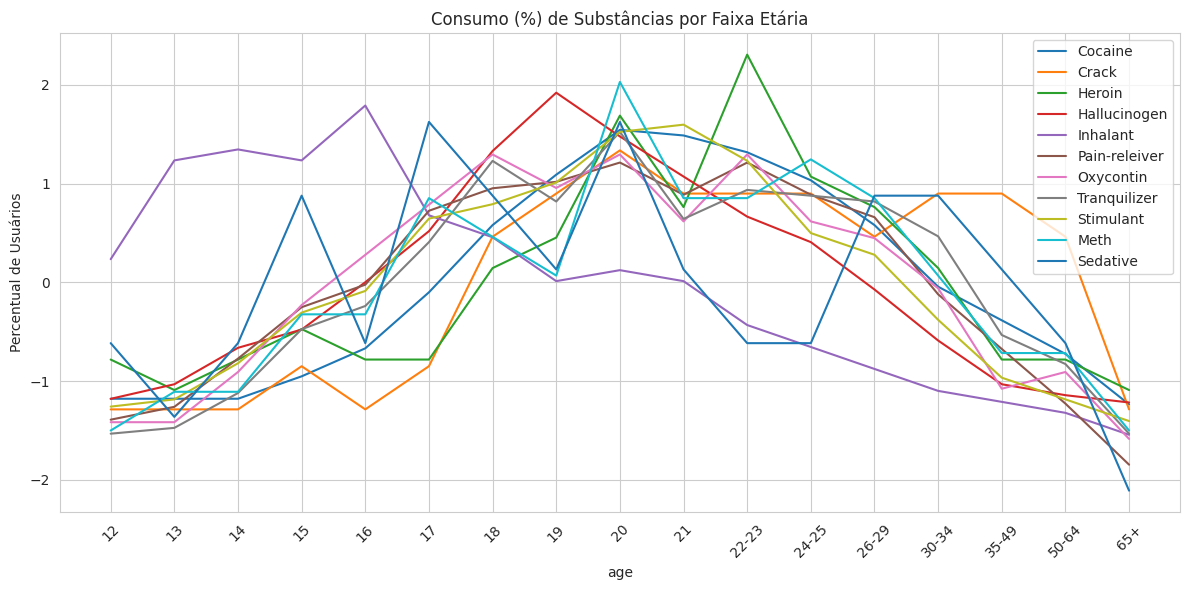

In [31]:
drugs = [col for col in df.columns if col.endswith('-use') and col not in ['alcohol-use', 'marijuana-use']]
plt.figure(figsize=(12, 6))
for drug in drugs:
    sns.lineplot(data=df, x='age', y=drug, label=drug.replace('-use','').capitalize())
plt.title("Consumo (%) de Substâncias por Faixa Etária")
plt.xticks(rotation=45)
plt.ylabel("Percentual de Usuários")
plt.legend()
plt.tight_layout()
plt.show()

É possível observar que drogas como **álcool**, **maconha** e **tranquilizantes** possuem crescimento marcante entre os adolescentes e jovens adultos, enquanto outras substâncias como **heroína** e **metanfetamina** mantêm baixos índices de consumo em todas as idades.

A visualização ajuda a identificar **picos de uso por faixa etária** e substâncias com comportamento semelhante, oferecendo subsídios para ações de prevenção direcionadas. Essa análise é essencial para entender **quais grupos estão mais vulneráveis** ao consumo de drogas específicas.

**5.5. Boxplots para Variabilidade de Frequência por Droga**

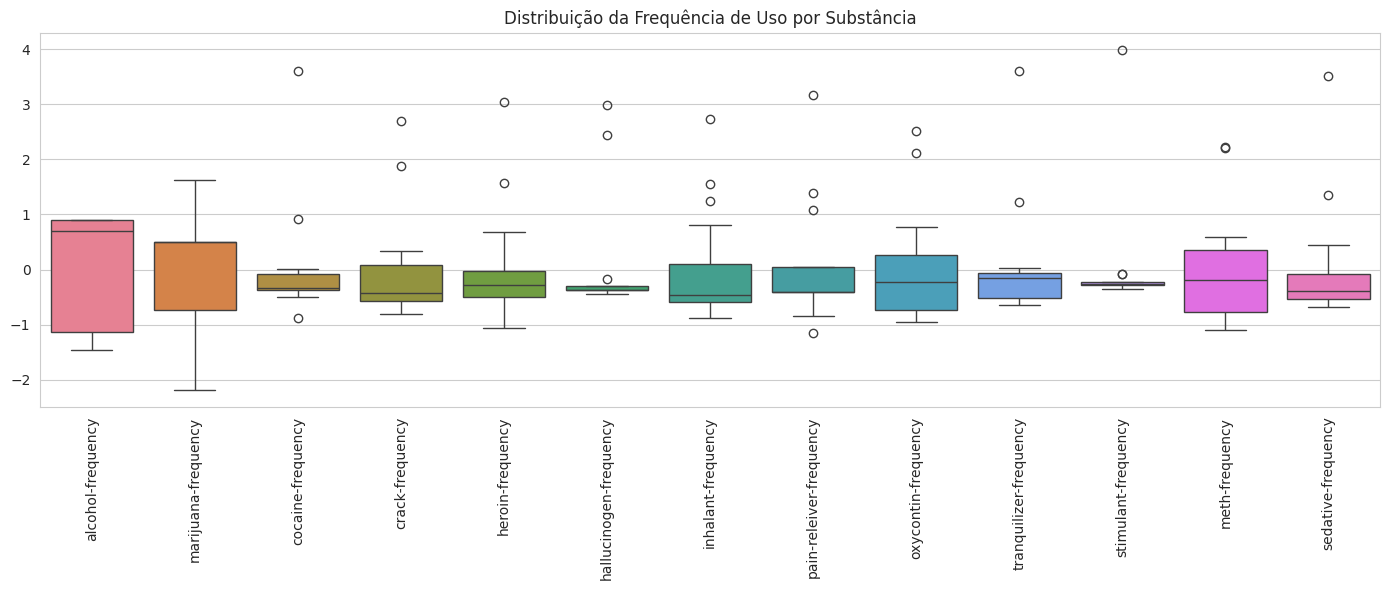

In [32]:
freq_cols = [col for col in df.columns if col.endswith('-frequency')]
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[freq_cols])
plt.xticks(rotation=90)
plt.title("Distribuição da Frequência de Uso por Substância")
plt.tight_layout()
plt.show()

Substâncias como **sedativos**, **tranquilizantes** e **maconha** demonstram uma ampla dispersão nos valores de frequência, indicando que embora possam ter consumo moderado em média, certos grupos os utilizam com muito mais intensidade.

Outras substâncias, como **crack**, **heroína** e **metanfetamina**, apresentam baixas medianas e menor variabilidade, sugerindo um **padrão mais restrito ou pontual de uso**.

Essa visualização permite identificar **outliers** (valores extremos) e entender o grau de uso recorrente por substância, o que é útil para avaliação de risco e severidade de exposição.

**6. Preparação para Modelagem**

**6.1. Definição de Features e Alvo**

In [17]:
X = df.drop(columns=['marijuana-use'])  # Exemplo: prever uso de maconha
y = df['marijuana-use']

**6.2. Divisão em Treino e Teste**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6.3 Normalização/Escalonamento de Features Numéricas**

In [19]:
from sklearn.preprocessing import StandardScaler

# Seleciona apenas colunas que terminam com '-use' ou '-frequency'
numeric_features = [col for col in X_train.columns if col.endswith('-use') or col.endswith('-frequency')]

# Escalonamento com StandardScaler
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


A variável alvo foi definida como `marijuana-use` por representar uma droga com variação significativa no consumo por idade.

**7. Conclusão**

A análise revelou padrões relevantes de consumo entre faixas etárias, com destaque para o uso mais frequente de álcool e maconha entre jovens adultos. O pré-processamento garante dados prontos para modelagem supervisionada, viabilizando previsões sobre risco de consumo. Esse tipo de estudo pode subsidiar ações preventivas e políticas públicas mais eficazes.

**7.1 Checklist de Boas Práticas**

- Definição clara do problema
- Tipo de aprendizado (EDA + potencial supervisionado)
- Premissas e restrições
- Atributos do dataset descritos
- Estatísticas descritivas aplicadas
- Verificação de valores faltantes
- Gráficos com análises interpretadas
- Pré-processamento de dados com justificativas
- Separação de treino e teste + escalonamento